In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
import numpy as np
import sklearn.model_selection

CODEBOOK: 
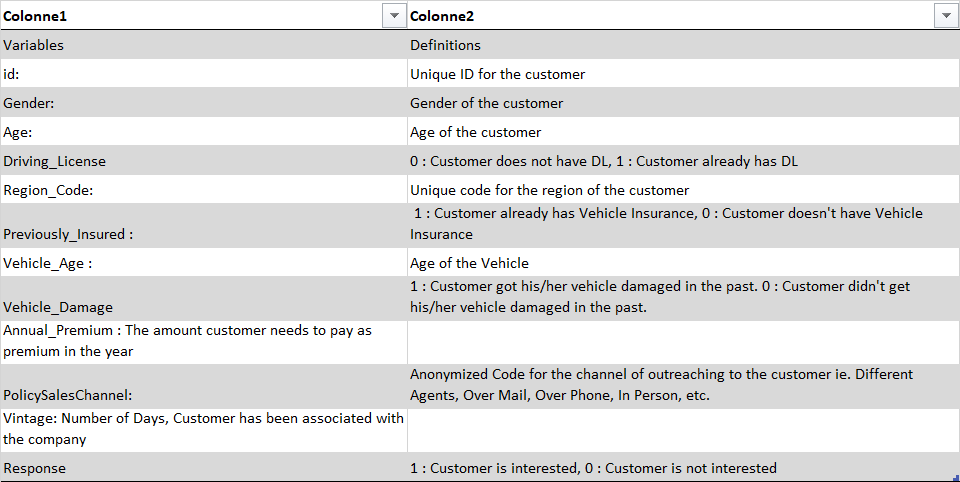

In [2]:
insurance_data= pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 2/train.csv')
insurance_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


1-) Project final module 2 : Analyse Exploratoire

Contexte : https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Objectif :
- Pour une compagnie d'assurance,  Quels sont les facteurs qui influencent les clients  qui possèdent déjà une mutuelle santé à s'intéresser par une assurance auto.
- Comprendre les données

Checklist : 

Analyse de forme : 
* variable cible : Response
* lignes et colonnes : Nous avons 12 variables et 381 109 clients  (lignes)
* types de variables : quantitatives = 9; qualitatives =3
* Analyse des valeurs manquantes : nous n'avons pas de valeurs manquantes

Analyse de fond :
* visualisation de la cible : 10% des clients sont interessés.
* signification des variables : nos variables ne suivent pas de lois normal. les variables qualitatives sont binaires
* relation variables/ variables cibles

# Analyse de forme

In [3]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
insurance_data.dtypes.value_counts()

int64      6
float64    3
object     3
dtype: int64

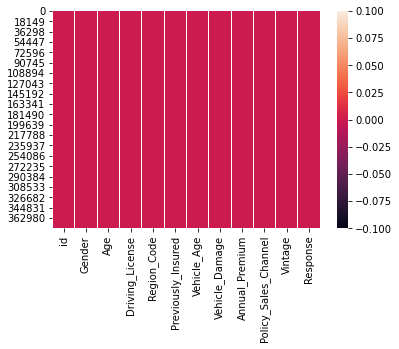

In [5]:
#Valeurs nulles?
sns.heatmap(insurance_data.isna())
# aucune valeur nulle.

# Analyse de la variable cible

In [6]:
insurance_data['Response'].value_counts(normalize = True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

# Analyse univariée des variables numériques

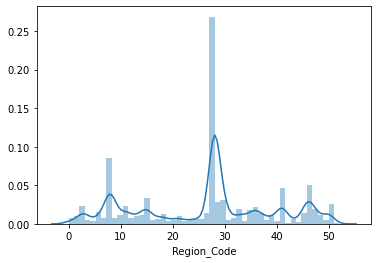

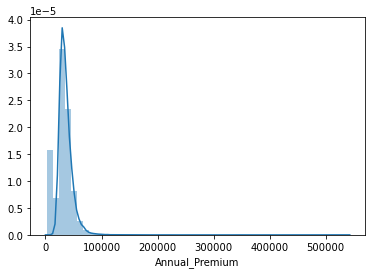

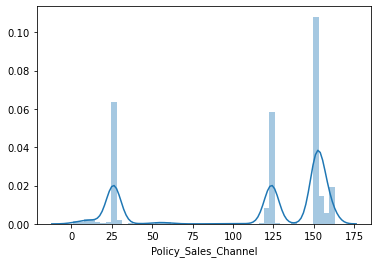

In [7]:
for col in insurance_data.select_dtypes('float'):
    plt.figure()
    sns.distplot(insurance_data[col])

C:\Users\patri\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\patri\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


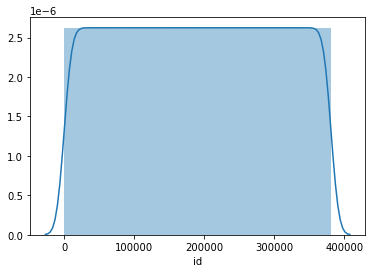

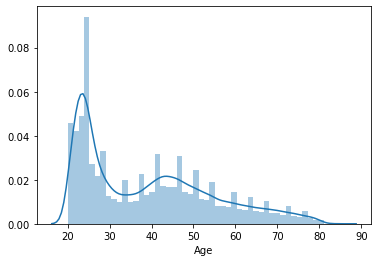

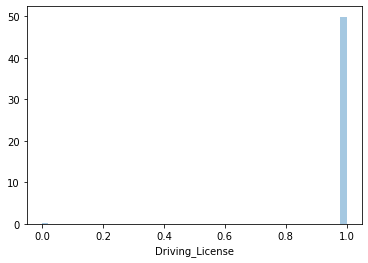

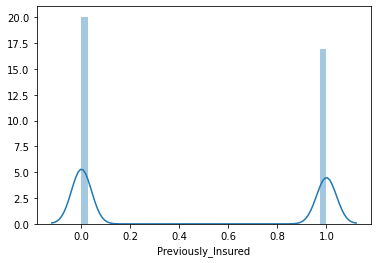

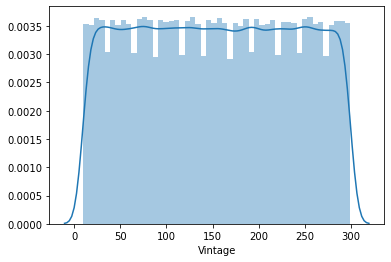

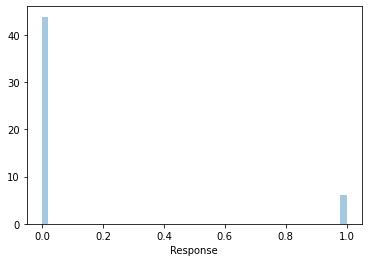

In [8]:
for col in insurance_data.select_dtypes('int64'):
    plt.figure()
    sns.distplot(insurance_data[col])

{'whiskers': [<matplotlib.lines.Line2D at 0x15b02dd22c8>,
 'caps': [<matplotlib.lines.Line2D at 0x15b02de4bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b02ddfbc8>],
 'medians': [<matplotlib.lines.Line2D at 0x15b02de7a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b02ddf088>],
 'means': []}

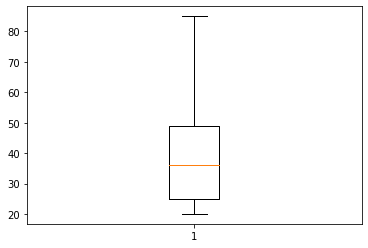

In [9]:
#Checking outliers
plt.boxplot(insurance_data['Age'])
# nous ne trouvons pas de outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x15b02e39788>,
 'caps': [<matplotlib.lines.Line2D at 0x15b02e4f688>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b02e45f48>],
 'medians': [<matplotlib.lines.Line2D at 0x15b02e4fec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b02e54bc8>],
 'means': []}

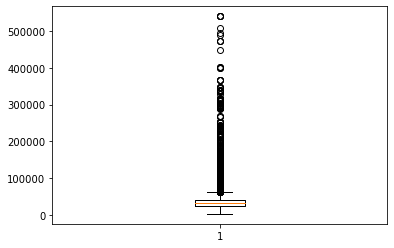

In [10]:
#checking outlier
plt.boxplot(insurance_data['Annual_Premium'])
#on constate qu'il y a effectivement des outliers pour cette variables cela pourrait s'expliquer par le fait que:
# les primes diffèrent d'une client à un autre cela dépend des garanties soucrites.

{'whiskers': [<matplotlib.lines.Line2D at 0x15b02ea04c8>,
 'caps': [<matplotlib.lines.Line2D at 0x15b02eb2e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b02eaae48>],
 'medians': [<matplotlib.lines.Line2D at 0x15b02eb5cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b02ebb9c8>],
 'means': []}

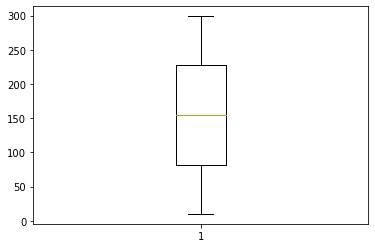

In [11]:
#la variable vintage ne contient pas de outlier
plt.boxplot(insurance_data['Vintage'])

# Analyse univariée variables catégorielles

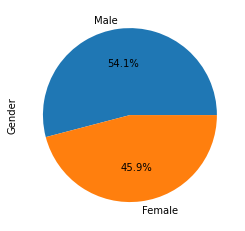

In [12]:
insurance_data['Gender'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')

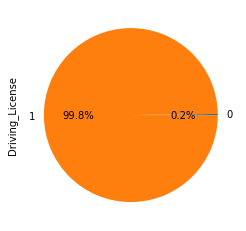

In [13]:
insurance_data['Driving_License'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')

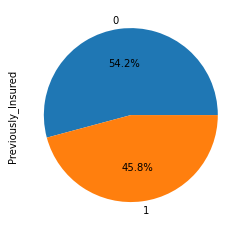

In [14]:
insurance_data['Previously_Insured'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')

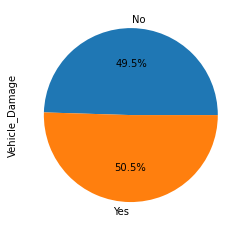

In [15]:
insurance_data['Vehicle_Damage'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')

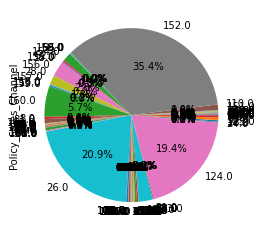

In [16]:
insurance_data['Policy_Sales_Channel'].value_counts(sort=False).plot.pie(autopct='%1.1f%%')

# Analyse bivariée matrice cible= Response

In [40]:
#Rajout et tranformation de variable 
#insurance_data['New_Driving_Licence']= insurance_data['Driving_License'].map({0:'Customer does not have DL',1:'Customer already has DL'})
#insurance_data['New_Previously_Insured']= insurance_data['Previously_Insured'].map({0:'Customer does not have vehicule insurance',1:'Customer already has vehicule insurance'})
#insurance_data['New_Vehicle_Age']= insurance_data['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})
#insurance_data['New_Response']=insurance_data['Response'].map({0:'Customer is not interessed',1:'Customer is interessed'})
#insurance_data

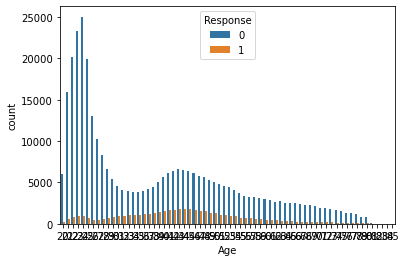

In [34]:
sns.countplot(x='Age',hue='Response',data=insurance_data)

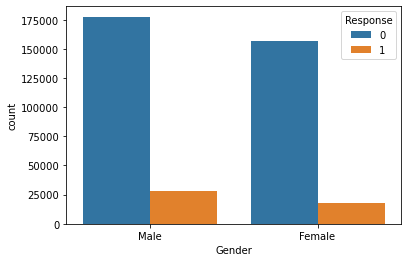

In [35]:
sns.countplot(x='Gender',hue='Response',data=insurance_data)

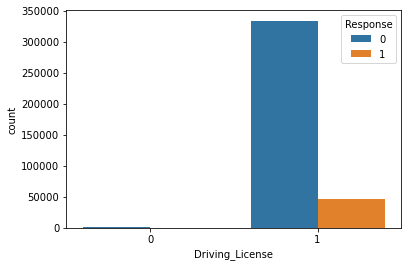

In [36]:
sns.countplot(x='Driving_License',hue='Response',data=insurance_data)

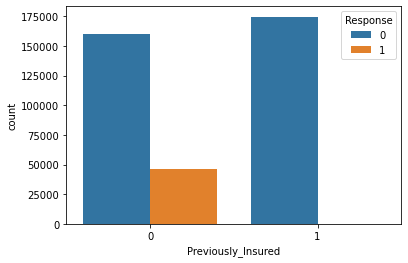

In [37]:
sns.countplot(x='Previously_Insured',hue='Response',data=insurance_data)

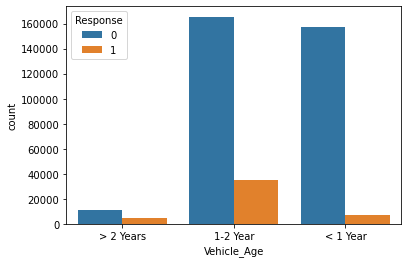

In [38]:
sns.countplot(x='Vehicle_Age',hue='Response',data=insurance_data)

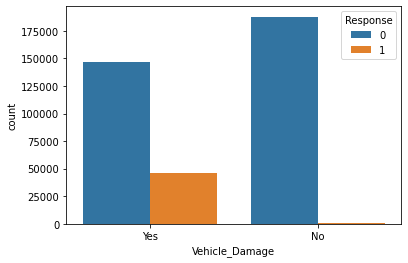

In [39]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=insurance_data)

In [ ]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=insurance_data)

In [22]:
grouped_Gender_New_Response = insurance_data.groupby(['Gender','Response'])
grouped_Gender_New_Response.size()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
dtype: int64

In [23]:
Gender_New_Response_table = pd.crosstab(index=insurance_data["Response"], 
                          columns=insurance_data["Gender"])

Gender_New_Response_table

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


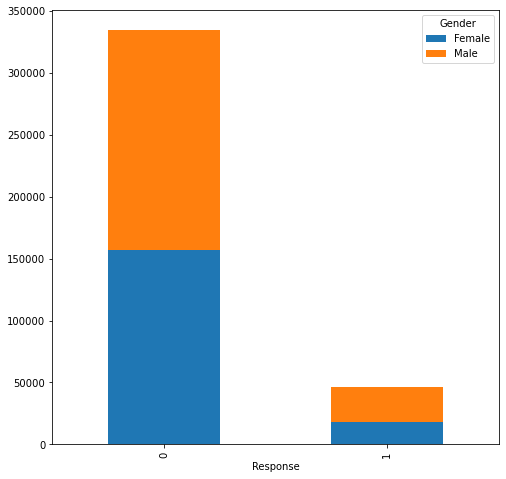

In [24]:
Gender_New_Response_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# Relation entre les différentes variables

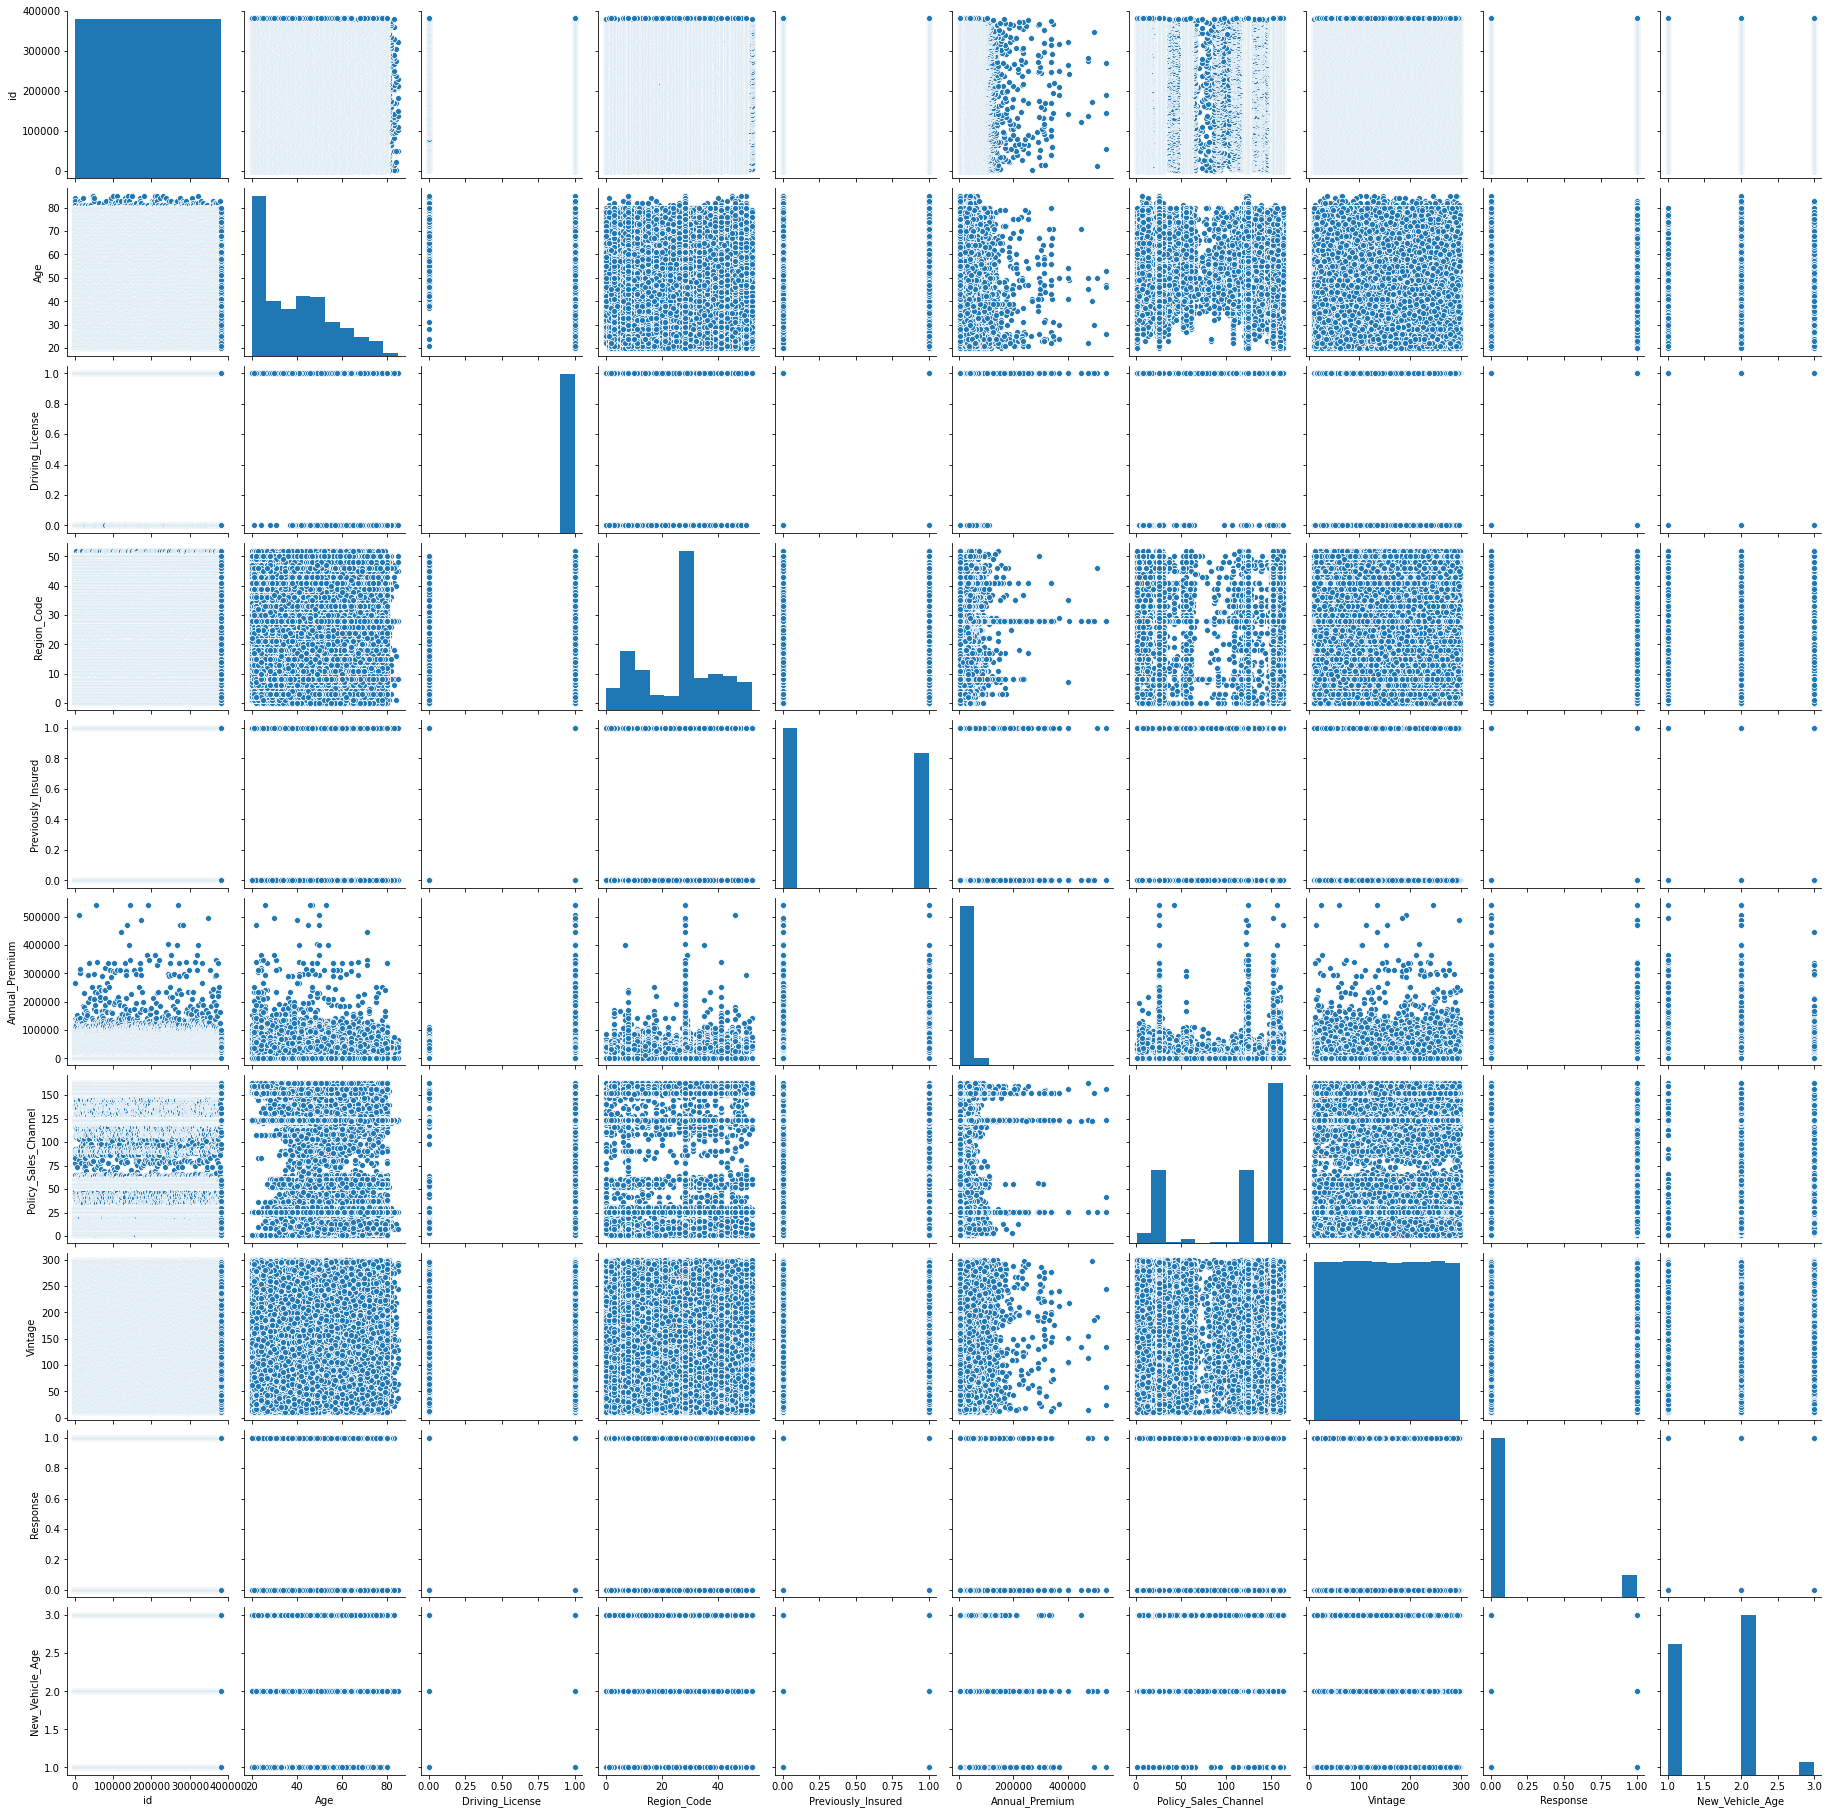

In [41]:
sns.pairplot(insurance_data)

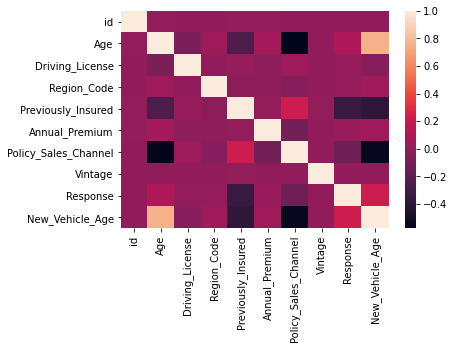

In [44]:
sns.heatmap(insurance_data.corr())

In [46]:
insurance_data.corr()['Response'].sort_values()

Previously_Insured     -0.341170
Policy_Sales_Channel   -0.139042
id                     -0.001368
Vintage                -0.001050
Driving_License         0.010155
Region_Code             0.010570
Annual_Premium          0.022575
Age                     0.111147
New_Vehicle_Age         0.221874
Response                1.000000
Name: Response, dtype: float64

In [48]:
#corrélation entre le genre et la variable cible
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = scipy.stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
cramers_V(insurance_data['Gender'],insurance_data['New_Response'])

0.0027491026393728765

on constate que les correlations entre les variables qualitatives  et  quantitatives et la target sont faibles

# création de sous_ensemble

In [52]:
interested = insurance_data[insurance_data['Response']== 1]

In [53]:
not_interested = insurance_data[insurance_data['Response']== 0]

In [54]:
interested.shape

(46710, 16)

In [55]:
not_interested.shape

(334399, 16)

# Tests statistiques : T-test, test d'indépendance

#le test de students 
#H0= les primes moyennes sont égales chez les personnes interessés et les personnes non interessés

In [56]:
from scipy.stats import ttest_ind

In [59]:
#échantillonage
balance_neg = not_interested.sample(interested.shape[0])

In [60]:
def t_test(col):
    alpha = 0.02
    stat,p = ttest_ind(balance_neg[col],interested[col])
    if p < alpha:
        return 'H0 rejetée'
    else :
        return 0

#test d'indépendance
#H0 : les variables Previously insured et Response sont indépendantes avec un intervale de confiance de à 95%

In [64]:
#Méthode notebook JM
#échantillonage des variables 
independance_test_Previously_Insured= insurance_data[["New_Previously_Insured",'New_Response']].sample(n=10000, random_state=1)
independance_test_Previously_Insured
# tableau de contingence après échantillonage
independance_test_Previously_Insured_tab = pd.crosstab(independance_test_Previously_Insured['New_Previously_Insured'],independance_test_Previously_Insured['New_Response'], margins = True)
independance_test_Previously_Insured_tab.columns=['Customer is interessed','Customer is not interessed','Columns1']
independance_test_Previously_Insured_tab.index=['Customer already has vehicule insurance','Customer does not have vehicule insurance','rows1']
independance_test_Previously_Insured_tab
#variable observé
independance_test_Previously_Insured_observed = independance_test_Previously_Insured_tab.iloc[0:2,0:2]
independance_test_Previously_Insured_observed

#expected variable
independance_test_Previously_Insured_expected =  np.outer(independance_test_Previously_Insured_tab["Columns1"][0:2],
                     independance_test_Previously_Insured_tab.loc["rows1"][0:2]) / 10000
independance_test_Previously_Insured_expected
independance_test_Previously_Insured_expected = pd.DataFrame(independance_test_Previously_Insured_expected)

independance_test_Previously_Insured_expected.columns = ['Customer is interessed','Customer is not interessed']
independance_test_Previously_Insured_expected.index = ['Customer already has vehicule insurance','Customer does not have vehicule insurance']
independance_test_Previously_Insured_expected
#chi_square
independance_test_Previously_Insured_chi_squared_stat = (((independance_test_Previously_Insured_observed-independance_test_Previously_Insured_expected)**2)/independance_test_Previously_Insured_expected).sum().sum()
independance_test_Previously_Insured_chi_squared_stat
#critical value
independance_test_Previously_Insured_chi_crit = scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *
independance_test_Previously_Insured_chi_crit

#p-value
independance_test_Previously_Insured_p_value = 1 - scipy.stats.chi2.cdf(x=independance_test_Previously_Insured_chi_squared_stat,  # Find the p-value
                             df=1)
independance_test_Previously_Insured_p_value


0.0

In [67]:
#Méthode RP research
import researchpy as rp
crosstab_Previously_Insured, test_results_Previously_Insured, expected_Previously_Insured = rp.crosstab(independance_test_Previously_Insured['New_Previously_Insured'],independance_test_Previously_Insured['New_Response'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results_Previously_Insured

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,1124.4700
1,p-value =,0.0000
2,Cramer's phi =,0.3353
